# deeptrack.extras.radialcenter

<a href="https://colab.research.google.com/github/DeepTrackAI/DeepTrack2/blob/develop/tutorials/3-advanced-topics/DTAT395_extras.radialcenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install deeptrack  # Uncomment if running on Colab/Kaggle.

This advanced tutorial introduces the deeptrack.extras.radialcenter module.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 1. What is radialcenter?

Radialcenter is a lightweight module that provides a single function to calculate the center of a intensity distribution.
This calculation utilizes gradients and least-squares regression to return a pair of floats (x, y) representing the central position of the distribution in the image.

## 2. Setup the Optics Device 

Create an optical device `optics` through which to view scatterers, in this case a fluorescence microscope implemented by the `Fluorescence` class.

In [3]:
from deeptrack.optics import Fluorescence

optics = Fluorescence(
    NA=0.7,
    wavelength=680e-9,
    resolution=1e-6,
    magnification=10,
    output_region=(0, 0, 64, 64),
)

## 3. Point Particle

The feature `PointParticle` resolves a point particle scatterer, which we will locate the center of with radialcenter.

x = 5.000156988633563, y = 16.000010250461614


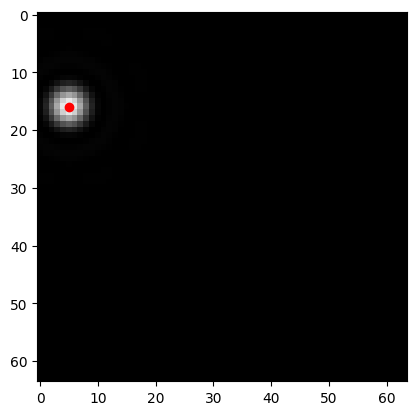

In [4]:
from deeptrack.scatterers import PointParticle
from deeptrack.extras.radialcenter import radialcenter

scatterer = PointParticle(
    intensity=100,  # Squared magnitude of the electric field.
    position_unit="pixel",  # Units of position (default meter).
    position=(16, 5),  # Position of the particle from the upper left corner.
)

imaged_scatterer = optics(scatterer)

intensity_distribution = imaged_scatterer.resolve()
x, y = radialcenter(intensity_distribution)
print(f"x = {x}, y = {y}")

imaged_scatterer.plot(cmap="gray")
plt.scatter(x, y, c="red")

## 4. Ellipse 

The feature `Ellipse` resolves a 2-dimensional elliptical disk, which we apply the radialcenter function to.

x = 31.999996389702574, y = 31.999996389702574


C:\Users\Alex Lech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\deeptrack\scatterers.py:101: UserWarning: Setting upsample != 1 is deprecated. Please, instead use dt.Upscale(f, factor=4)
  warnings.warn(


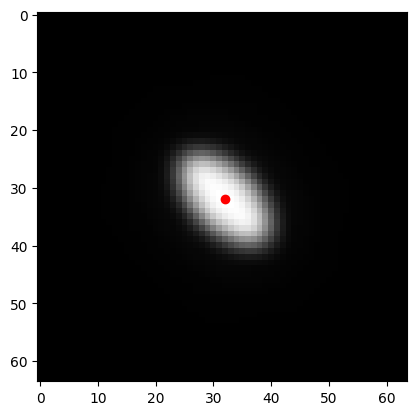

In [5]:
from deeptrack.scatterers import Ellipse

scatterer = Ellipse(
    intensity=100,  # Squared magnitude of the electric field.
    position_unit="pixel",  # Units of position (default meter).
    position=(32, 32),  # Position of the particle.
    radius=(1e-6, 0.5e-6),  # Dimensions of the principal axes of the ellipse.
    rotation=np.pi / 4,  # Amount the ellipse is rotated by in radians.
    upsample=4,  # Amount the resolution is upsampled for accuracy.
)

imaged_scatterer = optics(scatterer)

intensity_distribution = imaged_scatterer.resolve()
x, y = radialcenter(intensity_distribution)
print(f"x = {x}, y = {y}")

imaged_scatterer.plot(cmap="gray")
plt.scatter(x, y, c="red")

## 5. Multiple objects
Next up will be a demonstration on how radialcenter handles multiple objects.
Since this function treats the whole input image as a distribution, it will only compute a single center position. 

x = 22.185402075065056, y = 26.5916598606794


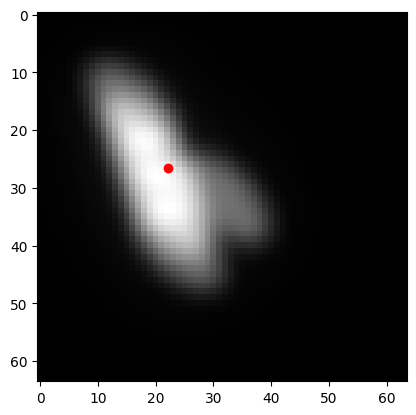

In [6]:
imaged_scatterer = optics(scatterer)
for i in range(5):
    scatterer = Ellipse(
        intensity=100,  # Squared magnitude of the electric field.
        position_unit="pixel",  # Units of position (default meter).
        position=(16+i*6, 16+i*2),  # Position of the particle.
        radius=(1e-6, 0.5e-6),  # Dimensions of the principal axes of the ellipse.
        rotation=np.pi / 4,  # Amount the ellipse is rotated by in radians.
        upsample=4,  # Amount the resolution is upsampled for accuracy.
    )
    imaged_scatterer += optics(scatterer)


intensity_distribution = imaged_scatterer.resolve()
x, y = radialcenter(intensity_distribution)
print(f"x = {x}, y = {y}")

imaged_scatterer.plot(cmap="gray")
plt.scatter(x, y, c="red")